In [10]:
from fly_analysis import braidz
from fly_analysis import filtering
from fly_analysis.processing import extract_stimulus_centered_data
import numpy as np
from matplotlib import pyplot as plt
from fly_analysis.plotting import plot_mean_and_std
from fly_analysis.plotting import plot_trajectory
from datetime import datetime
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from fly_analysis.trajectory import heading_direction_diff
import matplotlib.ticker as ticker
import os
import csv




In [2]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20241102_135649.braidz")
df,csvs["opto"]
data = extract_stimulus_centered_data(df, csvs["opto"])

Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20241102_135649.braidz using pyarrow


In [3]:
AngV = data["angular_velocity"]

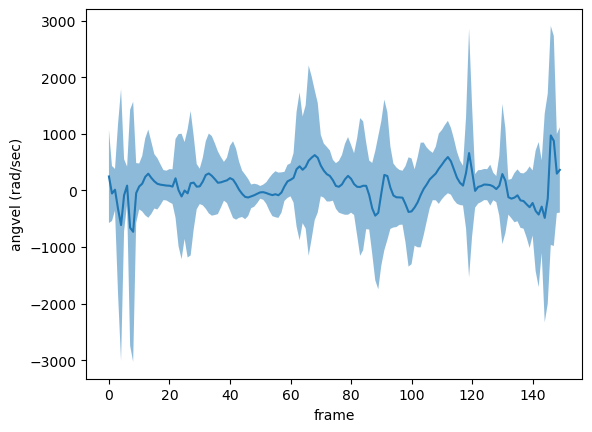

In [4]:
fig, ax = plt.subplots()
plot_mean_and_std(np.array(data["angular_velocity"]), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
plt.show()

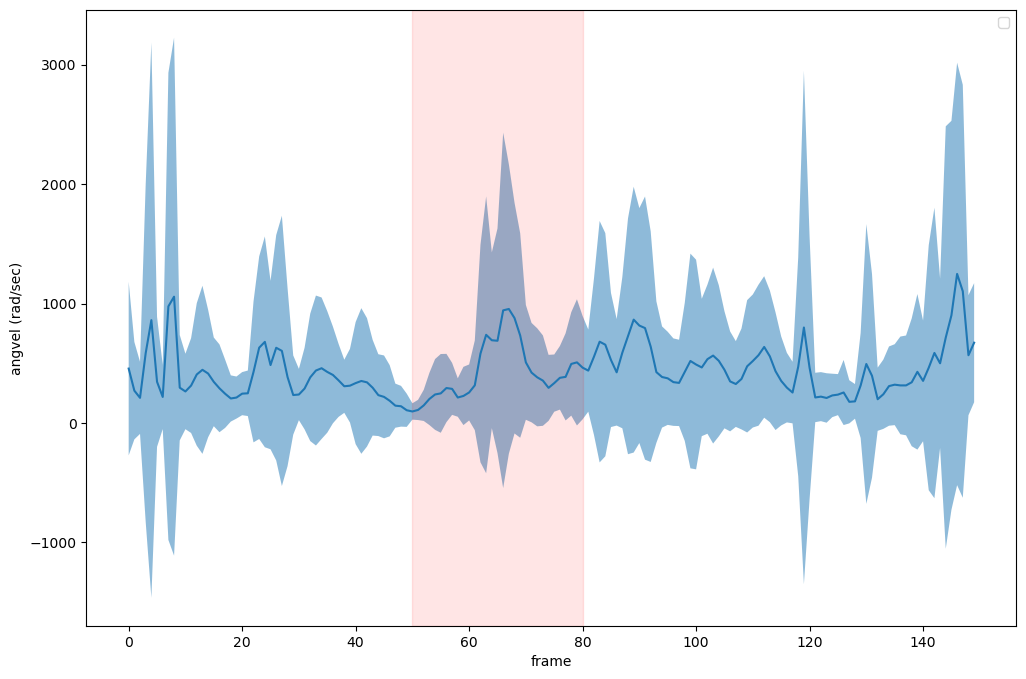

In [5]:
# Creating the plot with a specific figure size
plt.figure(figsize=(12, 8))
ax = plt.gca()  # Get current axes

# Plotting data and setting labels
plot_mean_and_std(np.abs(np.array(data["angular_velocity"])), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
ax.axvspan(50, 80, color='red', alpha=0.1)
ax.legend()
plt.show()

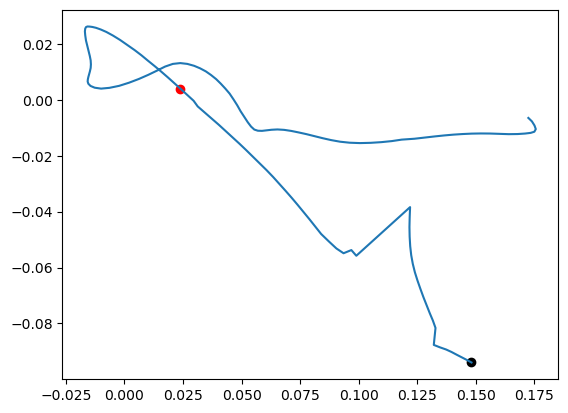

In [6]:
i = 7
traj = data["position"][i]

fig = plt.figure()
plt.plot(traj[:,0], traj[:,1])
plt.scatter(traj[50,0], traj[50,1], color="red")
plt.scatter(traj[0,0], traj[0,1], color="black")
plt.show()

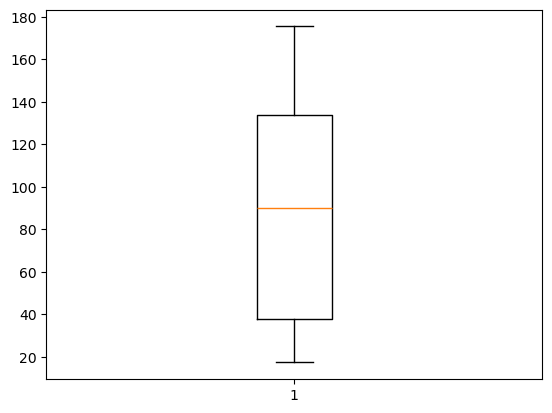

In [7]:
heading_diffs = []
for traj in data["position"]:
    heading_diffs.append(heading_direction_diff(traj, origin=50, end=80, n=10))

plt.figure()
plt.boxplot(np.abs(heading_diffs))
plt.show()

In [8]:
df,csvs["opto"]["timestamp"]

(         obj_id    frame     timestamp         x         y         z  \
 0             1   142271  1.730552e+09 -0.078384  0.112959  0.065042   
 1             2   142273  1.730552e+09 -0.078364  0.113007  0.064954   
 2             3   142281  1.730552e+09 -0.078089  0.112822  0.065254   
 3             4   142506  1.730552e+09 -0.055267  0.123027  0.073757   
 4             4   142507  1.730552e+09 -0.050054  0.122158  0.082790   
 ...         ...      ...           ...       ...       ...       ...   
 3222197  109662  7946956  1.730630e+09  0.141529  0.108184 -0.006706   
 3222198  109662  7946957  1.730630e+09  0.141455  0.108236 -0.006780   
 3222199  109662  7946958  1.730630e+09  0.141416  0.108263 -0.006832   
 3222200  109662  7946959  1.730630e+09  0.141417  0.108271 -0.006823   
 3222201  109662  7946960  1.730630e+09  0.141441  0.108225 -0.006772   
 
              xvel      yvel      zvel           P00           P01  \
 0        0.932682 -0.802131 -0.993867  6.954572e-06

In [17]:
timestamp_column = csvs["opto"]["timestamp"]
print(timestamp_column)
timestamp_column.to_csv('timestamp_output.csv', index=False)

0     1.730553e+09
1     1.730554e+09
2     1.730555e+09
3     1.730556e+09
4     1.730556e+09
5     1.730557e+09
6     1.730557e+09
7     1.730569e+09
8     1.730571e+09
9     1.730571e+09
10    1.730572e+09
11    1.730575e+09
12    1.730578e+09
13    1.730579e+09
14    1.730580e+09
15    1.730580e+09
16    1.730585e+09
17    1.730586e+09
18    1.730593e+09
19    1.730597e+09
20    1.730604e+09
21    1.730614e+09
Name: timestamp, dtype: float64
